In [1]:
%load_ext autoreload
%autoreload 2

# Geospatial model

In [2]:
import pandas as pd
from seminartools.data import read_inflation, read_merged

In [3]:
df = read_merged().reset_index()
df

c:\users\vandi\onedrive\documenten\github\seminar\seminartools\data.py:161: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df = df.resample("Q").apply(lambda x: (1 + x).prod() - 1)  # quarterly return
c:\users\vandi\onedrive\documenten\github\seminar\seminartools\data.py:397: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df = df.resample("Q").mean()  # Mean interest rate


,country,date,inflation,gdp_growth,interest_rate,unemployment_rate,commodity_CRUDE_PETRO,commodity_iNATGAS,commodity_iAGRICULTURE,commodity_iMETMIN,commodity_iPRECIOUSMET
0,Japan,1977-01-01,0.022951,2.187257,6.333333,2.3,0.00000,0.052425,0.144757,0.041940,0.112740
1,Canada,1977-01-01,0.023904,1.533830,8.166667,8.8,0.00000,0.052425,0.144757,0.041940,0.112740
2,United States,1977-01-01,0.017231,1.186233,4.700000,8.2,0.00000,0.052425,0.144757,0.041940,0.112740
3,Japan,1977-04-01,0.027244,0.703788,5.000000,2.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
4,Canada,1977-04-01,0.023346,0.510302,7.666667,8.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
...,...,...,...,...,...,...,...,...,...,...,...
2166,Italy,2023-01-01,0.003938,0.552944,3.000000,8.3,-0.02041,-0.585458,0.002037,0.007418,0.043183
2167,Canada,2023-01-01,0.006080,0.610026,4.500000,5.4,-0.02041,-0.585458,0.002037,0.007418,0.043183
2168,Sweden,2023-01-01,0.014955,0.656897,2.833333,7.8,-0.02041,-0.585458,0.002037,0.007418,0.043183
2169,Korea,2023-01-01,0.010538,0.329875,3.500000,3.2,-0.02041,-0.585458,0.002037,0.007418,0.043183


In [6]:
from seminartools.models.distance_model import DistanceModel

model = DistanceModel()
model

ImportError: cannot import name 'gaussian' from 'scipy.signal' (c:\Users\vandi\AppData\Local\anaconda3\envs\py311\Lib\site-packages\scipy\signal\__init__.py)

In [5]:
!pip install scipy

  Using cached scipy-1.13.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.13.0-cp311-cp311-win_amd64.whl (46.2 MB)


In [5]:
import scipy

scipy.__version__

'1.13.0'

In [ ]:
model.fit(df)

Creating regression coefficients: 100%|██████████| 9/9 [00:21<00:00,  2.37s/it]


ImportError: nutpie not found. Install it with conda install -c conda-forge nutpie

In [6]:
import arviz as az

az.summary(model.trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
ls_log__,0.424,0.825,-1.028,1.953,0.012,0.011,5693.0,2869.0,1.0
intercepts_rotated_[0],0.007,0.003,0.002,0.013,0.000,0.000,5268.0,4159.0,1.0
intercepts_rotated_[1],0.008,0.002,0.003,0.012,0.000,0.000,4545.0,4482.0,1.0
intercepts_rotated_[2],-0.002,0.004,-0.009,0.005,0.000,0.000,4596.0,4363.0,1.0
intercepts_rotated_[3],0.009,0.002,0.006,0.013,0.000,0.000,6909.0,4173.0,1.0
...,...,...,...,...,...,...,...,...,...
regression_coefficients_commodity_iPRECIOUSMET[15],-0.002,0.012,-0.024,0.021,0.000,0.000,7329.0,5631.0,1.0
regression_coefficients_commodity_iPRECIOUSMET[16],0.001,0.012,-0.022,0.024,0.000,0.000,7695.0,5609.0,1.0
regression_coefficients_commodity_iPRECIOUSMET[17],-0.004,0.012,-0.027,0.019,0.000,0.000,7956.0,5126.0,1.0
regression_coefficients_commodity_iPRECIOUSMET[18],0.001,0.014,-0.025,0.026,0.000,0.000,6982.0,5114.0,1.0


In [7]:
x = az.summary(model.trace)
# all index starting with interceps
x = x[x.index.str.startswith("intercepts[")]
x

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercepts[0],0.007,0.003,0.002,0.013,0.000,0.0,5268.0,4159.0,1.00
intercepts[1],0.008,0.002,0.003,0.012,0.000,0.0,4545.0,4482.0,1.00
intercepts[2],0.005,0.002,0.001,0.008,0.000,0.0,7968.0,3894.0,1.00
intercepts[3],0.009,0.002,0.006,0.013,0.000,0.0,6909.0,4173.0,1.00
intercepts[4],0.009,0.002,0.005,0.013,0.000,0.0,6905.0,4342.0,1.00
intercepts[5],0.024,0.012,0.001,0.047,0.001,0.0,579.0,1130.0,1.01
intercepts[6],0.014,0.004,0.007,0.023,0.000,0.0,8038.0,5027.0,1.00
intercepts[7],0.026,0.008,0.008,0.040,0.000,0.0,2031.0,2816.0,1.00
intercepts[8],0.010,0.003,0.005,0.015,0.000,0.0,5621.0,4927.0,1.00
intercepts[9],0.014,0.003,0.008,0.020,0.000,0.0,6349.0,5598.0,1.00


Text(0.5, 1.0, 'Regression intercept per country')

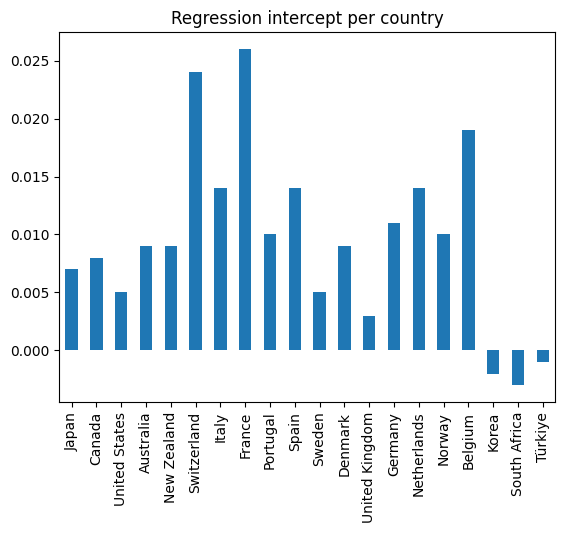

In [10]:
import matplotlib.pyplot as plt
x.set_index(model.countries)["mean"].plot.bar()
plt.title("Regression intercept per country")

# Prediction

In [11]:
preds = model.predict(df)
preds

inflation
date       country                 
2023-04-01 Australia       0.006542
           Belgium         0.005805
           Canada          0.006814
           Denmark         0.002993
           France          0.006981
           Germany         0.011505
           Italy           0.006372
           Japan          -0.000212
           Korea           0.006698
           Netherlands    -0.000263
           New Zealand     0.004214
           Norway          0.001447
           Portugal        0.002447
           South Africa    0.014593
           Spain          -0.001264
           Sweden          0.001485
           Switzerland     0.001214
           United States   0.005597